In [1]:
"""
one_hot encoding
red, green, blue
1     0     0
0     1     0
0     0     1
"""

'\none_hot encoding\nred, green, blue\n1     0     0\n0     1     0\n0     0     1\n'

In [2]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

#integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

['cold' 'cold' 'warm' 'cold' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 2 0 2 1]


In [4]:
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [5]:
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

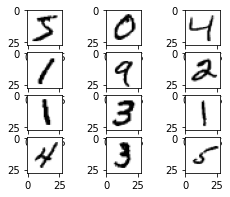

In [3]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train.shape[0]

60000

In [5]:
X_test.shape[0]

10000

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
X_train = X_train /255
X_test = X_test /255

In [9]:
#Keras modelimizi oluşturalım
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

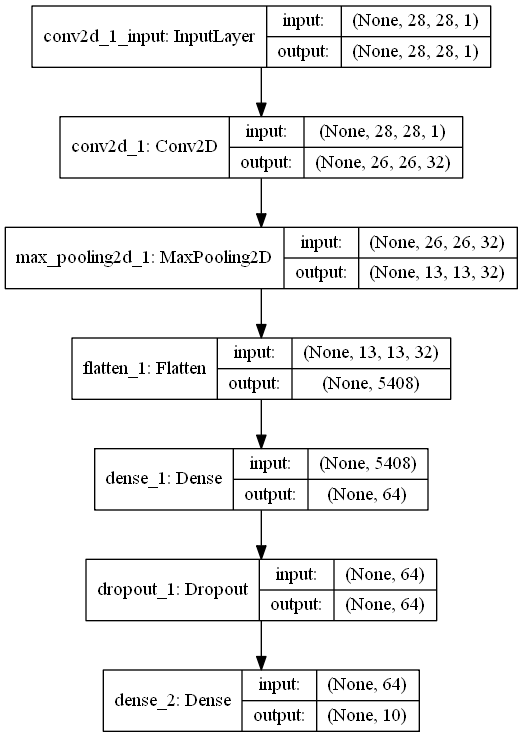

In [11]:
tf.keras.utils.plot_model(model, "aigroup7-mnist.png",show_shapes = True, show_layer_names = True)